In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# 데이터 로딩 및 전처리
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
data = pd.read_csv(url)
data = data.drop(columns='id')


# 성별 데이터 원-핫 인코딩
encoder = OneHotEncoder(sparse=False)
sex_encoded = encoder.fit_transform(data[['Sex']])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['Sex']))

# 원-핫 인코딩된 데이터를 기존 데이터프레임에 결합
data = pd.concat([data.drop(columns='Sex'), sex_encoded_df], axis=1)


# Rings 값을 지정된 범주로 변환
bins = [0, 8, 11, 30]
labels = ['0-8', '9-11', '12-30']
data['Age_Category'] = pd.cut(data['Rings'], bins=bins, labels=labels, right=False)

# 레이블 인코딩
le = LabelEncoder()
data['Age_Category'] = le.fit_transform(data['Age_Category'])

# 특성과 레이블 분리
X = data.drop(['Rings', 'Age_Category'], axis=1)
y = data['Age_Category']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



C:\Users\Hyeon\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Hyeon\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [2]:

# 신경망 모델 구축
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)



Epoch 1/200


C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5638 - loss: 0.9074 - val_accuracy: 0.6756 - val_loss: 0.7060
Epoch 2/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6704 - loss: 0.6995 - val_accuracy: 0.7055 - val_loss: 0.6788
Epoch 3/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6622 - loss: 0.6841 - val_accuracy: 0.7025 - val_loss: 0.6725
Epoch 4/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6820 - loss: 0.6575 - val_accuracy: 0.7205 - val_loss: 0.6515
Epoch 5/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6944 - loss: 0.6622 - val_accuracy: 0.6981 - val_loss: 0.6537
Epoch 6/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.6789 - loss: 0.6638 - val_accuracy: 0.7190 - val_loss: 0.6465
Epoch 7/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.6964 - loss: 0.6600 - val_accuracy: 0.7040 - val_loss: 0.6483
Epoch 8/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6953 - loss: 0.6442 - val_accuracy: 0.7025 - val_loss:

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7184 - loss: 0.6042 - val_accuracy: 0.6996 - val_loss: 0.6510
Epoch 52/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7136 - loss: 0.5912 - val_accuracy: 0.7085 - val_loss: 0.6345
Epoch 53/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7184 - loss: 0.6102 - val_accuracy: 0.7040 - val_loss: 0.6348
Epoch 54/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7322 - loss: 0.5918 - val_accuracy: 0.7175 - val_loss: 0.6263
Epoch 55/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7149 - loss: 0.6016 - val_accuracy: 0.7025 - val_loss: 0.6458
Epoch 56/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7233 - loss: 0.5946 - val_accuracy: 0.6996 - val_loss: 0.6505
Epoch 57/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7158 - loss: 0.6246 - val_accuracy: 0.7055 - val_loss: 0.6344
Epoch 58/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7359 - loss: 0.5777 - val_accuracy: 0.7145 - val_lo

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7414 - loss: 0.5648 - val_accuracy: 0.7115 - val_loss: 0.6492
Epoch 102/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7437 - loss: 0.5479 - val_accuracy: 0.6981 - val_loss: 0.6407
Epoch 103/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7484 - loss: 0.5690 - val_accuracy: 0.7010 - val_loss: 0.6380
Epoch 104/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7387 - loss: 0.5635 - val_accuracy: 0.7070 - val_loss: 0.6440
Epoch 105/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7436 - loss: 0.5500 - val_accuracy: 0.6996 - val_loss: 0.6555
Epoch 106/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.7397 - loss: 0.5634 - val_accuracy: 0.6876 - val_loss: 0.6654
Epoch 107/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.7443 - loss: 0.5622 - val_accuracy: 0.6891 - val_loss: 0.6437
Epoch 108/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7339 - loss: 0.5805 - val_accuracy: 0.70

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7474 - loss: 0.5413 - val_accuracy: 0.6846 - val_loss: 0.6828
Epoch 152/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7670 - loss: 0.5282 - val_accuracy: 0.6771 - val_loss: 0.6607
Epoch 153/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7570 - loss: 0.5361 - val_accuracy: 0.6996 - val_loss: 0.6565
Epoch 154/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7458 - loss: 0.5463 - val_accuracy: 0.7070 - val_loss: 0.6509
Epoch 155/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7512 - loss: 0.5235 - val_accuracy: 0.6876 - val_loss: 0.6624
Epoch 156/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7453 - loss: 0.5447 - val_accuracy: 0.6861 - val_loss: 0.6633
Epoch 157/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7548 - loss: 0.5453 - val_accuracy: 0.6951 - val_loss: 0.6682
Epoch 158/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7633 - loss: 0.5153 - val_accuracy: 0.6951 -

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.6861 - loss: 0.7038
Test Accuracy: 67.46%


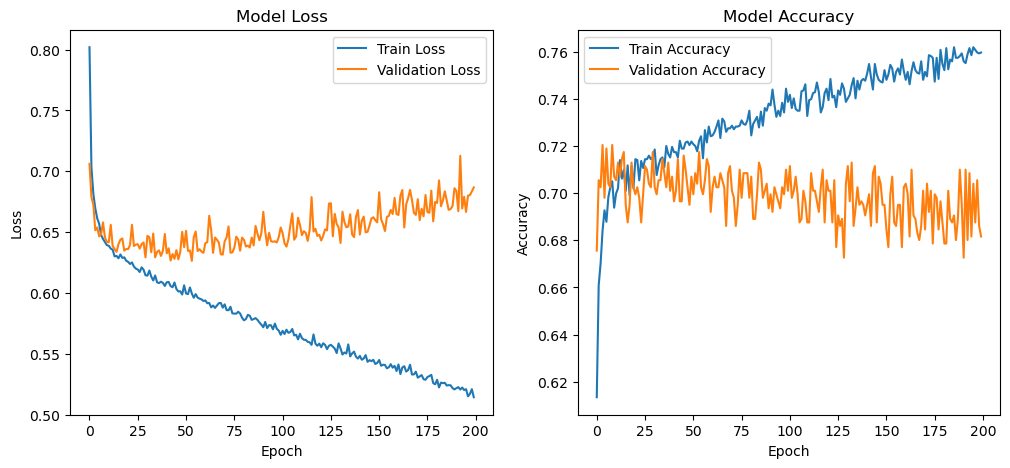

In [3]:
import matplotlib.pyplot as plt

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# 손실 및 정확도 그래프 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
# 200에서 조사해본 결과, epoch = 50 이내에서 가장 적절할 것으로 판단됩니다.

In [4]:

# 신경망 모델 구축
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5054 - loss: 0.9532 - val_accuracy: 0.6652 - val_loss: 0.7211
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6410 - loss: 0.7337 - val_accuracy: 0.6936 - val_loss: 0.6876
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6735 - loss: 0.6847 - val_accuracy: 0.7025 - val_loss: 0.6664
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7041 - loss: 0.6442 - val_accuracy: 0.7025 - val_loss: 0.6747
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.7035 - loss: 0.6523 - val_accuracy: 0.7220 - val_loss: 0.6502
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.7084 - loss: 0.6477 - val_accuracy: 0.7130 - val_loss: 0.6411
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.7073 - loss: 0.6359 - val_accuracy: 0.7115 - val_loss: 0.6506
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6951 - loss: 0.6463 - val_accuracy: 0.7130 - val_loss: 0.64

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.7002 - loss: 0.6191
Test Accuracy: 69.50%


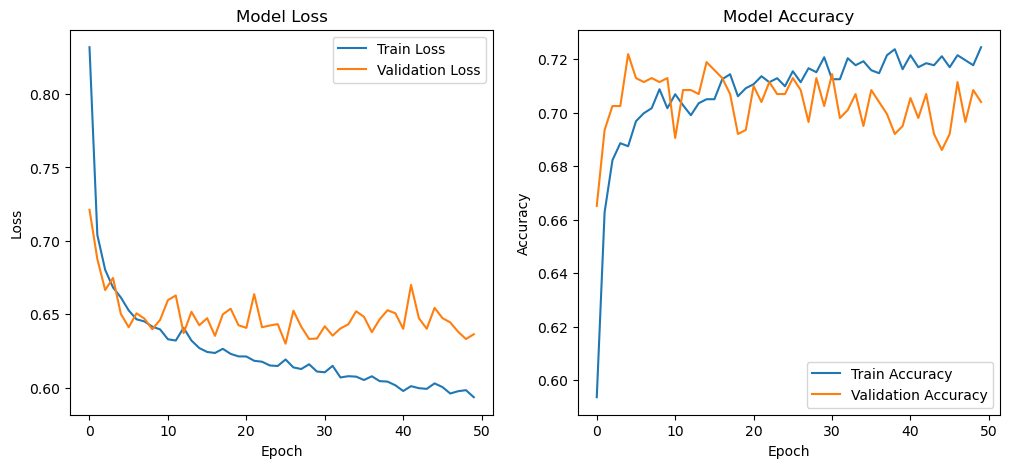

In [5]:
import matplotlib.pyplot as plt

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# 손실 및 정확도 그래프 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
# epoch17 이전에서는 검증정확도가 더 높은 것으로 보아 언더피팅된 것으로 보입니다.


In [7]:
# 신경망 모델 구축
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5721 - loss: 0.8683 - val_accuracy: 0.6697 - val_loss: 0.7168
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6724 - loss: 0.6984 - val_accuracy: 0.6906 - val_loss: 0.6927
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6863 - loss: 0.6909 - val_accuracy: 0.6966 - val_loss: 0.6773
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.6797 - loss: 0.6847 - val_accuracy: 0.7160 - val_loss: 0.6576
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6944 - loss: 0.6644 - val_accuracy: 0.7145 - val_loss: 0.6501
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6949 - loss: 0.6667 - val_accuracy: 0.7055 - val_loss: 0.6683
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6836 - loss: 0.6689 - val_accuracy: 0.7160 - val_loss: 0.6457
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6949 - loss: 0.6428 - val_accuracy: 0.7040 - val_los

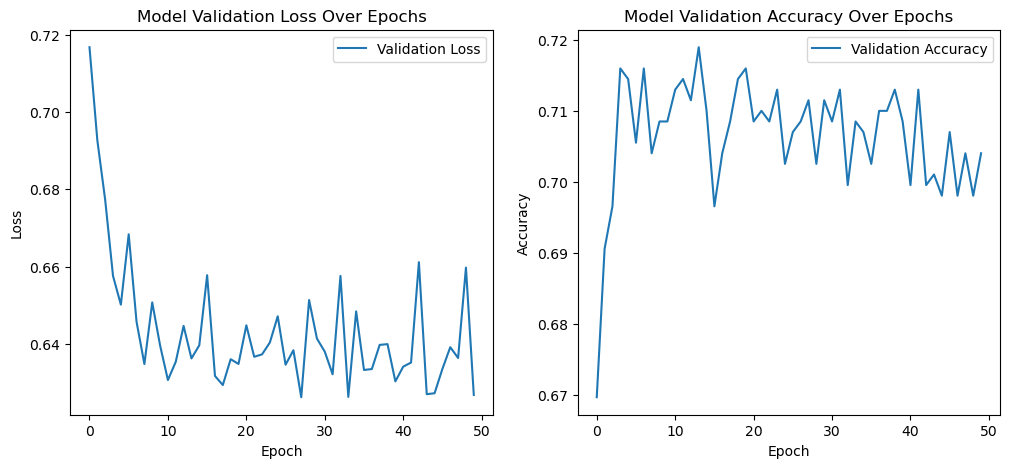

Best model at epoch: 20 with validation accuracy: 0.72


In [9]:
import numpy as np

# 성능 그래프
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 최적 모델 성능 ----> 에포크 15~23 범위 조정
best_epoch_range = np.argmax(history.history['val_accuracy'][14:23]) + 15 
best_accuracy = max(history.history['val_accuracy'][14:23])
print(f'Best model at epoch: {best_epoch_range} with validation accuracy: {best_accuracy:.2f}')